In [33]:
import pandas as pd
import numpy as np
from pymssa import MSSA
import matplotlib.pyplot as plt
import warnings
from pyts.decomposition import SingularSpectrumAnalysis
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

In [3]:
stock = pd.read_csv('./data/TSLA.csv')

In [4]:
stock = stock.iloc[:1000]
stock = stock[['close', 'time']]
stock['time'] = pd.to_datetime(stock['time'])
stock = stock.set_index('time')

In [5]:
temp = pd.read_csv('./data/temp.csv')

In [6]:
temp = temp[['date', 'meantemp']]
temp['date'] = pd.to_datetime(temp['date'])
temp = temp.set_index('date')

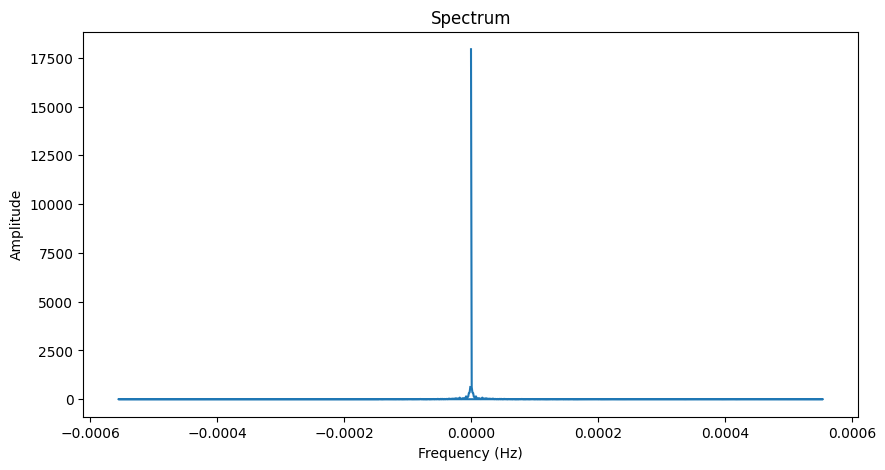

In [7]:
fft_result = np.fft.fft(stock['close'])

# Вычисляем абсолютные значения (для получения мощности)
fft_abs = np.abs(fft_result)

# Вычисляем частоты (в Гц)
freqs = np.fft.fftfreq(len(stock), d=15*60)

# Строим график мощности гармоник
plt.figure(figsize=(10, 5))
plt.plot(freqs, fft_abs)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum')
plt.show()

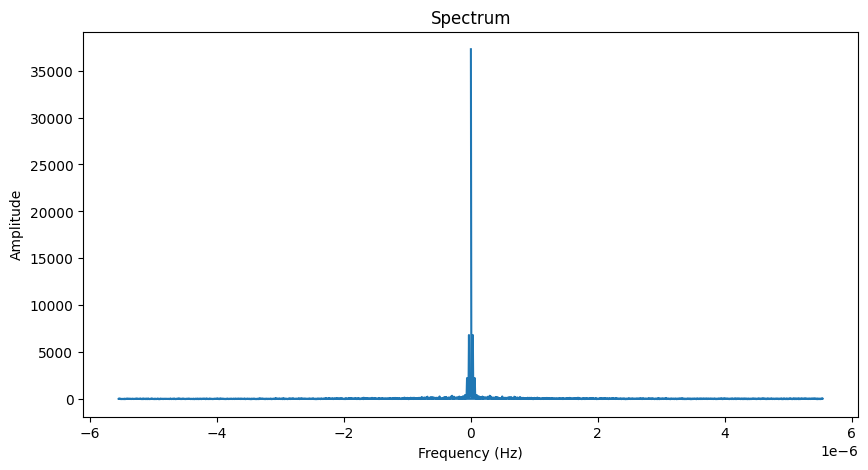

In [8]:
fft_result = np.fft.fft(temp['meantemp'])

# Вычисляем абсолютные значения (для получения мощности)
fft_abs = np.abs(fft_result)

# Вычисляем частоты (в Гц)
freqs = np.fft.fftfreq(len(temp), d=25 * 60 * 60)

# Строим график мощности гармоник
plt.figure(figsize=(10, 5))
plt.plot(freqs, fft_abs)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum')
plt.show()

In [17]:
mssa = MSSA(n_components=3,
            window_size=30,
            verbose=True)
x=stock['close']
mssa.fit(x)

Constructing trajectory matrix
Trajectory matrix shape: (30, 971)
Decomposing trajectory covariance matrix with SVD
Constructing components
Calculating optimal reconstruction orders


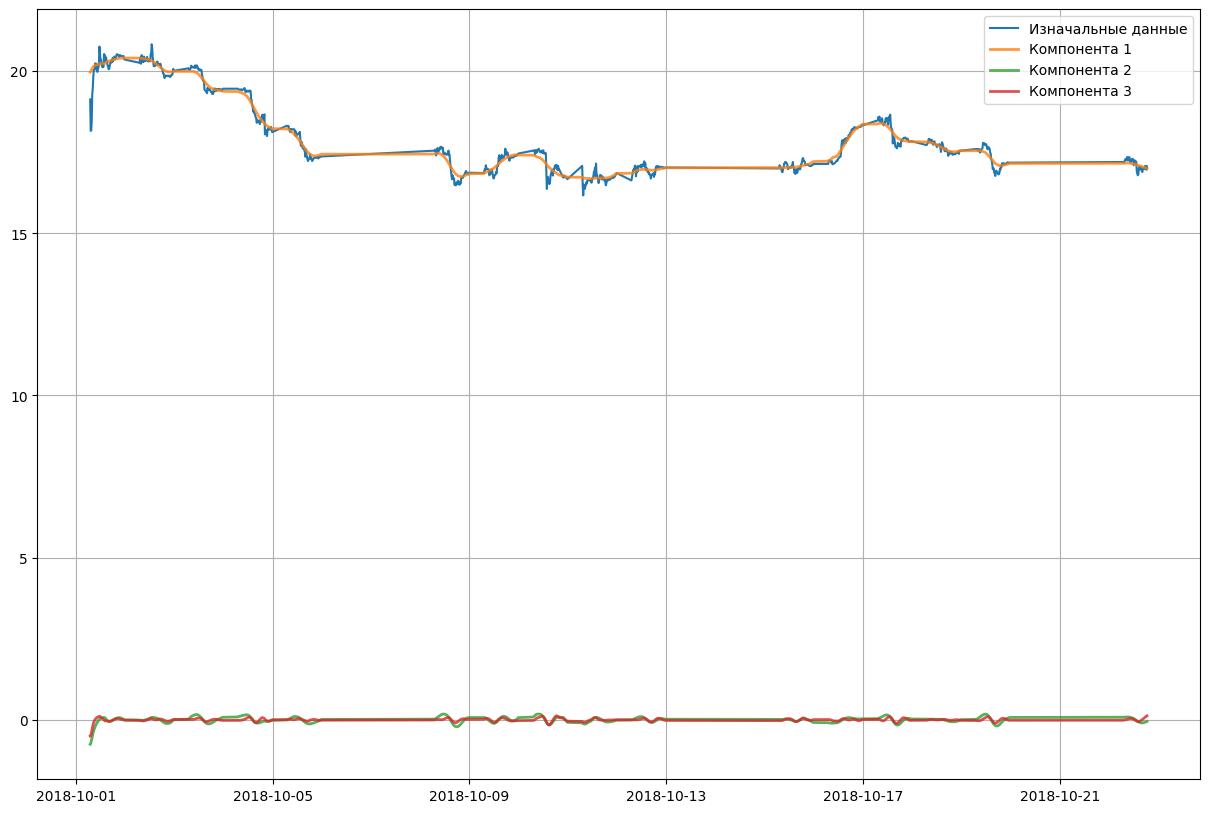

In [27]:
fig=plt.figure(figsize=(15, 10))
plt.plot(stock['close'], label='Изначальные данные')
plt.grid()

for idx in range(3):
    component = mssa.components_[0, :, idx]
    plt.plot(x.index, component, lw=2, alpha=0.8, label=f'Компонента {idx + 1}')

plt.legend()

In [29]:
mssa = MSSA(n_components=3,
            window_size=30,
            verbose=True)
x=temp['meantemp']
mssa.fit(x)

Constructing trajectory matrix
Trajectory matrix shape: (30, 1433)
Decomposing trajectory covariance matrix with SVD
Constructing components
Calculating optimal reconstruction orders


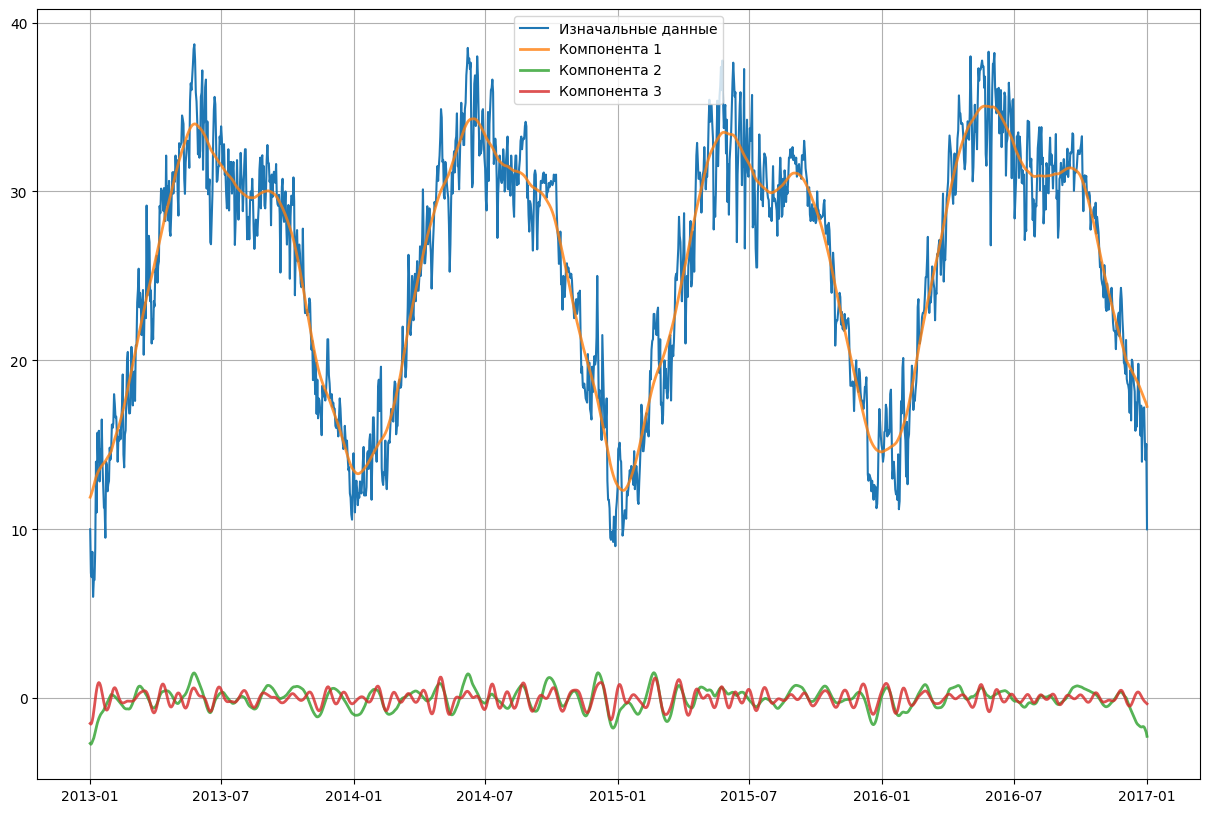

In [30]:
fig=plt.figure(figsize=(15, 10))
plt.plot(temp['meantemp'], label='Изначальные данные')
plt.grid()

for idx in range(3):
    component = mssa.components_[0, :, idx]
    plt.plot(x.index, component, lw=2, alpha=0.8, label=f'Компонента {idx + 1}')

plt.legend()

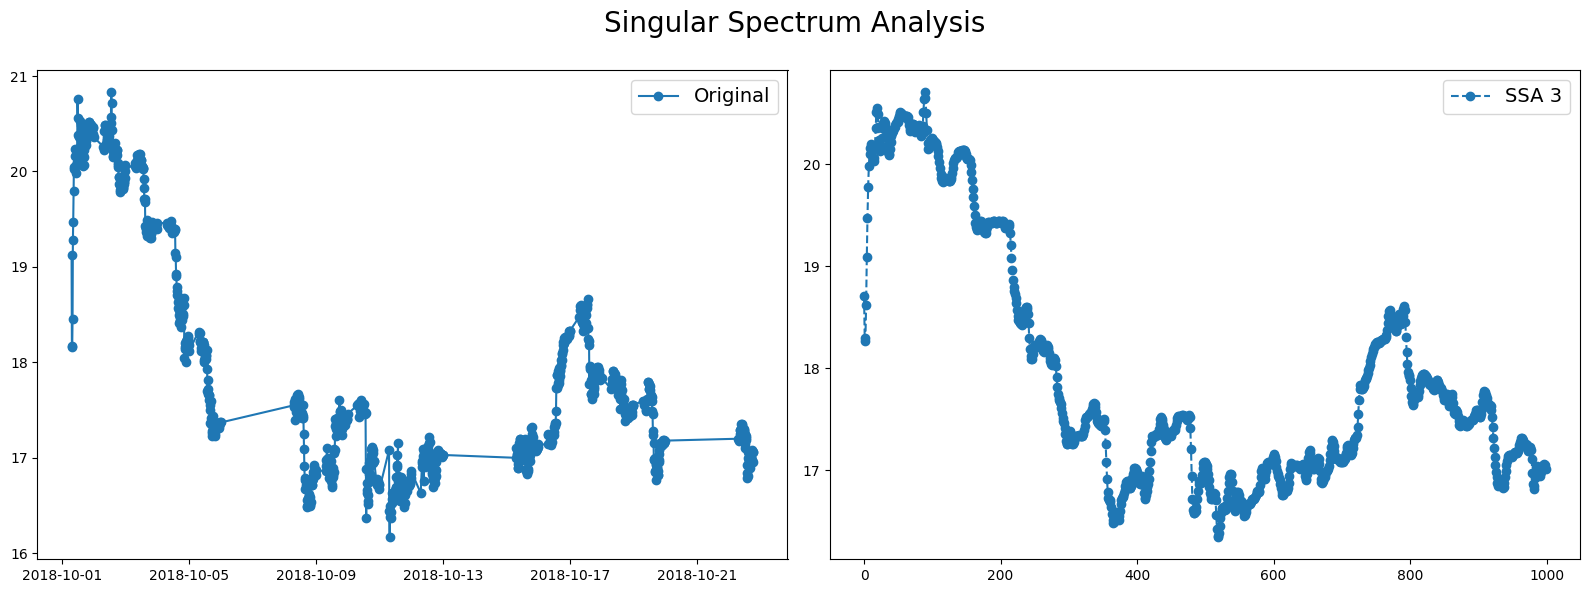

In [54]:
window_size = 15
groups = [np.arange(i, i + 5) for i in range(0, 11, 5)]

ssa = SingularSpectrumAnalysis(window_size=15, groups=groups)
X_ssa = ssa.fit_transform(stock['close'].values.reshape(1, -1))

plt.figure(figsize=(16, 6))

ax1 = plt.subplot(121)
ax1.plot(stock, 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
ax2.plot(X_ssa[0, 0], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

In [56]:
mse = mean_squared_error(stock['close'], X_ssa[0, 0])
print('MSE: ', mse)

MSE:  0.0026014435002881297


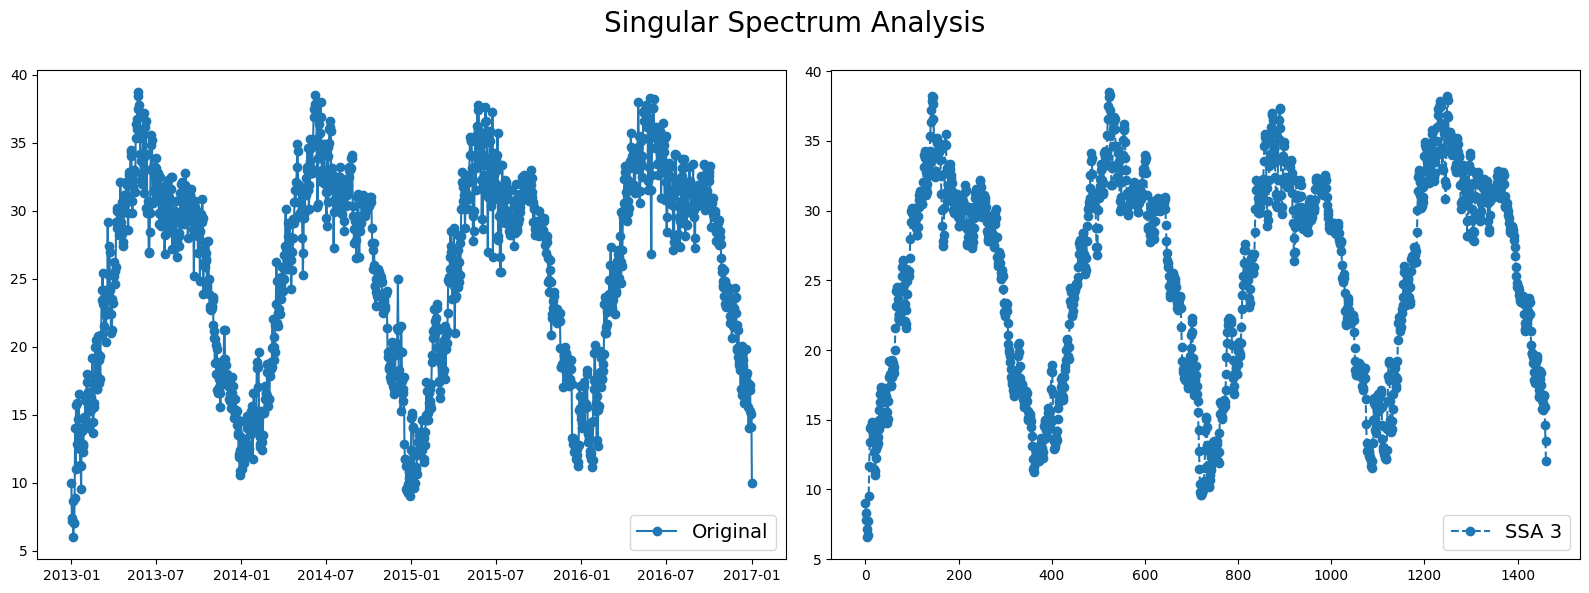

In [57]:
window_size = 15
groups = [np.arange(i, i + 5) for i in range(0, 11, 5)]

ssa = SingularSpectrumAnalysis(window_size=15, groups=groups)
X_ssa = ssa.fit_transform(temp['meantemp'].values.reshape(1, -1))

plt.figure(figsize=(16, 6))

ax1 = plt.subplot(121)
ax1.plot(temp['meantemp'], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
ax2.plot(X_ssa[0, 0], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

In [58]:
mse = mean_squared_error(temp['meantemp'], X_ssa[0, 0])
print('MSE: ', mse)

MSE:  0.8080187489335563
